<a href="https://colab.research.google.com/github/hikmah1/AnalisisGambarDanDataSains/blob/main/Classification_X-ray%20Covid_Using%20CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_dir = "/content/drive/My Drive/dataset/covid19-xray"
root_dir

'/content/drive/My Drive/dataset/covid19-xray'

In [ ]:
import os, re, glob, numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
path = os.path.abspath('Covid19.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir('/content/drive/My Drive/dataset/covid19-xray/') #list directory in Land Use Images folder
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/dataset/covid19-xray/'+i+'/*'):
        im = cv2.imread(pic) #open image
        im = cv2.resize(im,(150,150))
        im = np.array(im) #change into array
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10): #SAmple
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);
     

Jumlah normal : 4770
Jumlah covid : 3616


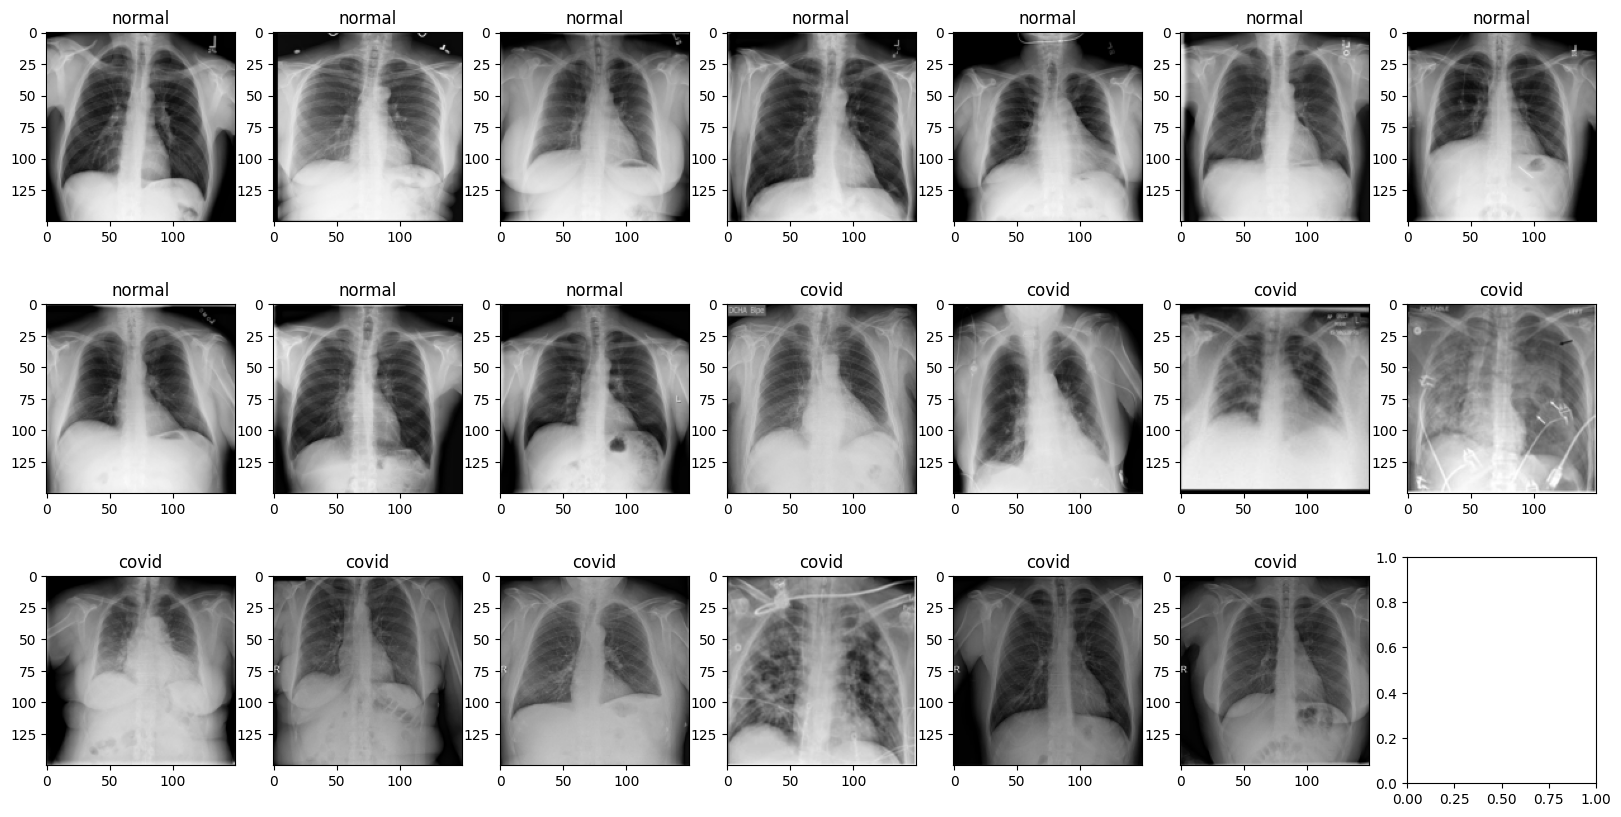

In [ ]:
fig, axs = plt.subplots(3, 7, figsize=(20, 10))
cnt = 0
row = 0
col = 0
for i in im_arr:
    for key, value in i.items():
        if(cnt==7):
            row = row + 1
            col = 0
            cnt = 0
        axs[row, col].imshow(value)
        axs[row, col].set_title(key)
        cnt = cnt + 1
        col = col + 1
plt.show()


In [ ]:
# PREPROCESSING
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 2) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 2) #change label to binary / categorical

In [ ]:
# ARSITEKTUR
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(2, activation='softmax')) #softmax works

In [ ]:
# COMPILE
from keras.optimizers import SGD
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 36, 36, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 41472)            

In [ ]:
#TRAINING
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
176/176 [==============================] - 218s 1s/step - loss: 0.6270 - accuracy: 0.6408 - val_loss: 0.5320 - val_accuracy: 0.7327
Epoch 2/10
176/176 [==============================] - 211s 1s/step - loss: 0.5129 - accuracy: 0.7446 - val_loss: 0.5459 - val_accuracy: 0.7341
Epoch 3/10
176/176 [==============================] - 210s 1s/step - loss: 0.4417 - accuracy: 0.7909 - val_loss: 0.4148 - val_accuracy: 0.8074
Epoch 4/10
176/176 [==============================] - 211s 1s/step - loss: 0.3426 - accuracy: 0.8521 - val_loss: 0.3420 - val_accuracy: 0.8580
Epoch 5/10
176/176 [==============================] - 210s 1s/step - loss: 0.2995 - accuracy: 0.8720 - val_loss: 0.3013 - val_accuracy: 0.8815
Epoch 6/10
176/176 [==============================] - 212s 1s/step - loss: 0.2454 - accuracy: 0.9055 - val_loss: 0.2786 - val_accuracy: 0.8862
Epoch 7/10
176/176 [==============================] - 211s 1s/step - loss: 0.2197 - accuracy: 0.9117 - val_loss: 0.2570 - val_accuracy: 0.9010

In [ ]:
#PREDIKSI
y_pred = model.predict(X_test)

87/87 [==============================] - 23s 263ms/step


In [ ]:
# ITERASI X_TEST
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
    max_n = max(y_pred[i])
    max_m = max(y_test[i])
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
    y_prediction_n.append(index_n)
    y_test_n.append(index_m)

In [ ]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID","NORMAL"]))

              precision    recall  f1-score   support

       COVID       0.94      0.91      0.92      1585
      NORMAL       0.88      0.92      0.90      1183

    accuracy                           0.91      2768
   macro avg       0.91      0.92      0.91      2768
weighted avg       0.92      0.91      0.91      2768



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

87/87 [==============================] - 24s 277ms/step


array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.914378612716763


array([[1442,  143],
       [  94, 1089]])

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["covid","normal"], 

SyntaxError: ignored